<a href="https://colab.research.google.com/github/lokaa12/221230053-Pengantar-ML/blob/main/week-8/UTS_TITANIC_FIX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ==== Tahap 1: Import Library & Load Dataset ====
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [ ]:
# Load dataset langsung dari seaborn
df = sns.load_dataset('titanic')

print("===== DATASET HEAD =====")
print(df.head())
print("\n===== INFO DATASET =====")
print(df.info())

===== DATASET HEAD =====
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

===== INFO DATASET =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --

In [ ]:
# 3. HANDLING MISSING VALUES
df['age'] = df['age'].fillna(df['age'].mean())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df['deck'] = df['deck'].cat.add_categories("Unknown").fillna("Unknown")
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])
df = df.dropna(subset=['survived'])  # pastikan target tidak kosong

print("\nMissing Value After Cleaning:")
print(df.isnull().sum())


Missing Value After Cleaning:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


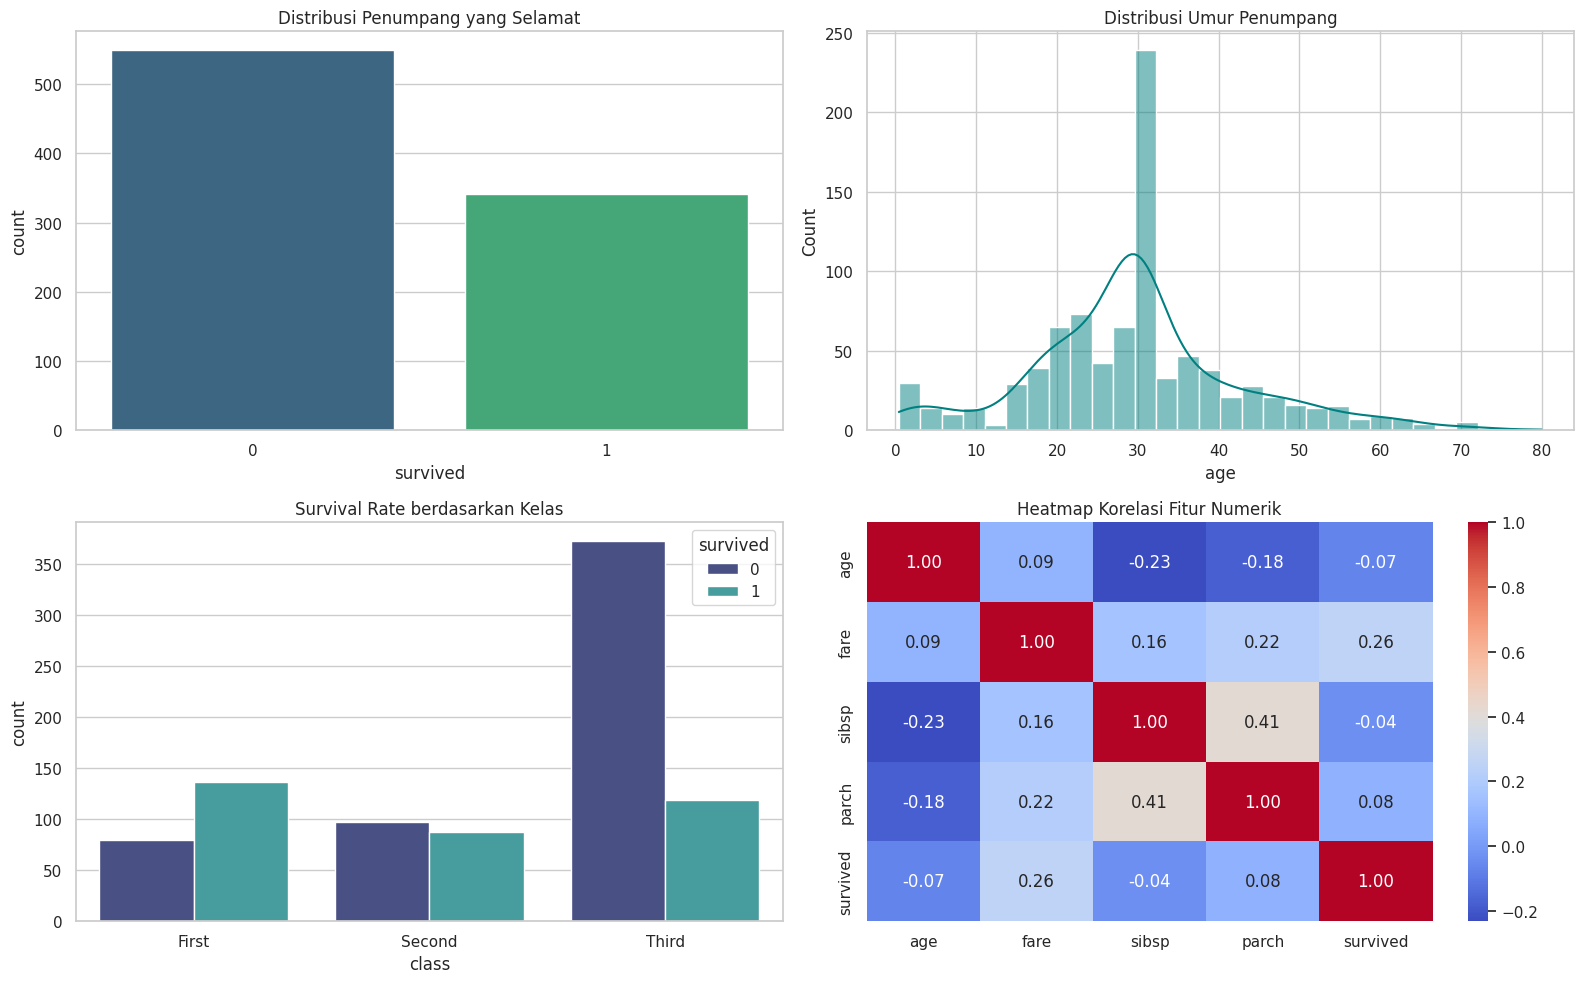

In [ ]:
# ========================================
# VISUALISASI EDA
# ========================================

plt.figure(figsize=(16,10))

# --- Grafik 1: Survived Countplot ---
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='survived', palette="viridis")
plt.title("Distribusi Penumpang yang Selamat")

# --- Grafik 2: Distribusi Umur ---
plt.subplot(2, 2, 2)
sns.histplot(df['age'], kde=True, color='teal')
plt.title("Distribusi Umur Penumpang")

# --- Grafik 3: Survival per Class ---
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='class', hue='survived', palette="mako")
plt.title("Survival Rate berdasarkan Kelas")

# --- Grafik 4: Heatmap Korelasi Numerik ---
plt.subplot(2, 2, 4)
sns.heatmap(df[['age','fare','sibsp','parch','survived']].corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Fitur Numerik")

plt.tight_layout()
plt.show()




===== FEATURE IMPORTANCE (Random Forest) =====
          Fitur  Importance
1          fare    0.225751
0           age    0.204505
9    adult_male    0.121038
4           sex    0.099318
8           who    0.089544
5         class    0.080211
11         deck    0.056054
2         sibsp    0.048174
3         parch    0.027638
10  embark_town    0.018377
6      embarked    0.017344
7         alone    0.012046


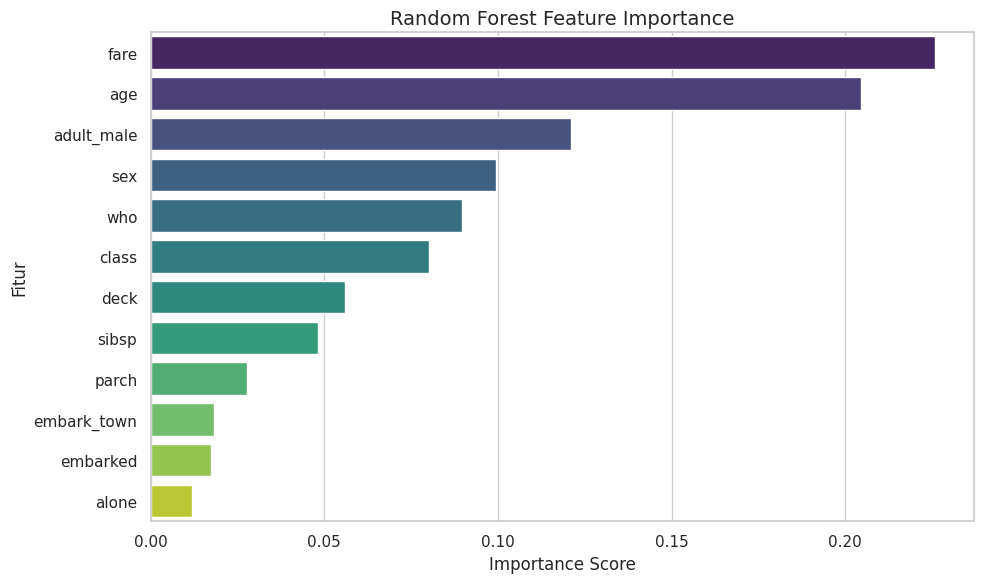

In [ ]:
# ============================================
# ==== FEATURE IMPORTANCE (Random Forest) ====
# ============================================

importances = model_rf.feature_importances_
feature_names = X.columns

# Buat dataframe agar rapi
fi_df = pd.DataFrame({
    'Fitur': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\n===== FEATURE IMPORTANCE (Random Forest) =====")
print(fi_df)

# Visualisasi
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Fitur', data=fi_df, palette="viridis")
plt.title("Random Forest Feature Importance", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Fitur")
plt.tight_layout()
plt.show()


In [ ]:
# =====================================================
# ==== Tambahan Untuk Menghindari Error (Encoding + PCA)
# =====================================================

# Fitur numerik
num_cols = ['age', 'fare', 'sibsp', 'parch']

# Fitur kategori
cat_cols = ['sex', 'class', 'embarked', 'alone', 'who', 'adult_male', 'embark_town', 'deck']

# Label Encoding
le = LabelEncoder()
df_encoded = df.copy()
for col in cat_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# Tentukan X dan y
X = df_encoded[num_cols + cat_cols]
y = df_encoded['survived']

# Scaling
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x_scaled)

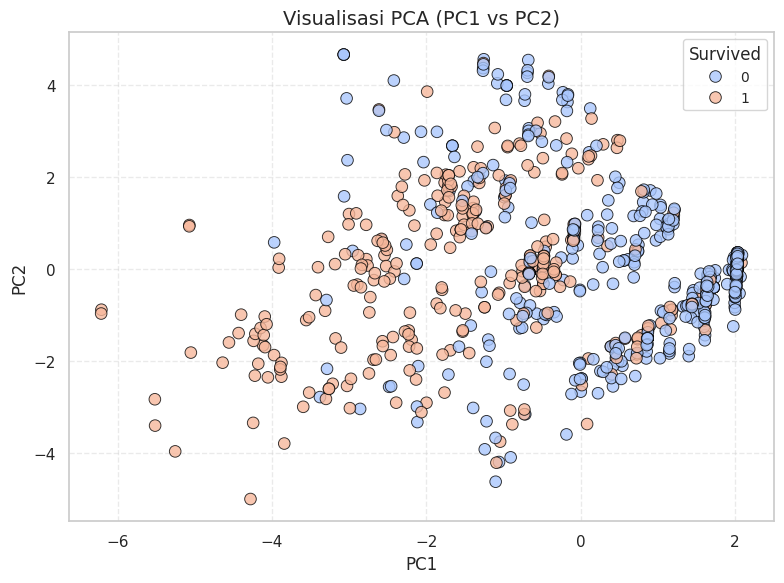

In [ ]:
# =====================================================
# VISUALISASI PCA
# =====================================================

plt.figure(figsize=(8,6))

sns.scatterplot(
    x=pca_result[:, 0],
    y=pca_result[:, 1],
    hue=df['survived'],
    palette="coolwarm",
    s=70,
    alpha=0.8,
    edgecolor="black"
)

plt.title("Visualisasi PCA (PC1 vs PC2)", fontsize=14)
plt.xlabel("PC1", fontsize=12)
plt.ylabel("PC2", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(title="Survived", fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
# =====================================================
# ==== Tahap 4: Implementasi ML ====
# =====================================================

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    x_scaled, y, test_size=0.2, random_state=42
)

# Model 1: Random Forest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)

# Model 2: Logistic Regression
model_log = LogisticRegression()
model_log.fit(X_train, y_train)
pred_log = model_log.predict(X_test)

In [ ]:
# =====================================================
# ==== Tahap 5: Evaluasi Model + Visualisasi CM ====
# =====================================================

print("\n===== Random Forest Evaluation =====")
print("Accuracy:", accuracy_score(y_test, pred_rf))
print(confusion_matrix(y_test, pred_rf))
print(classification_report(y_test, pred_rf))

print("\n===== Logistic Regression Evaluation =====")
print("Accuracy:", accuracy_score(y_test, pred_log))
print(confusion_matrix(y_test, pred_log))
print(classification_report(y_test, pred_log))


===== Random Forest Evaluation =====
Accuracy: 0.8156424581005587
[[92 13]
 [20 54]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179


===== Logistic Regression Evaluation =====
Accuracy: 0.8100558659217877
[[90 15]
 [19 55]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



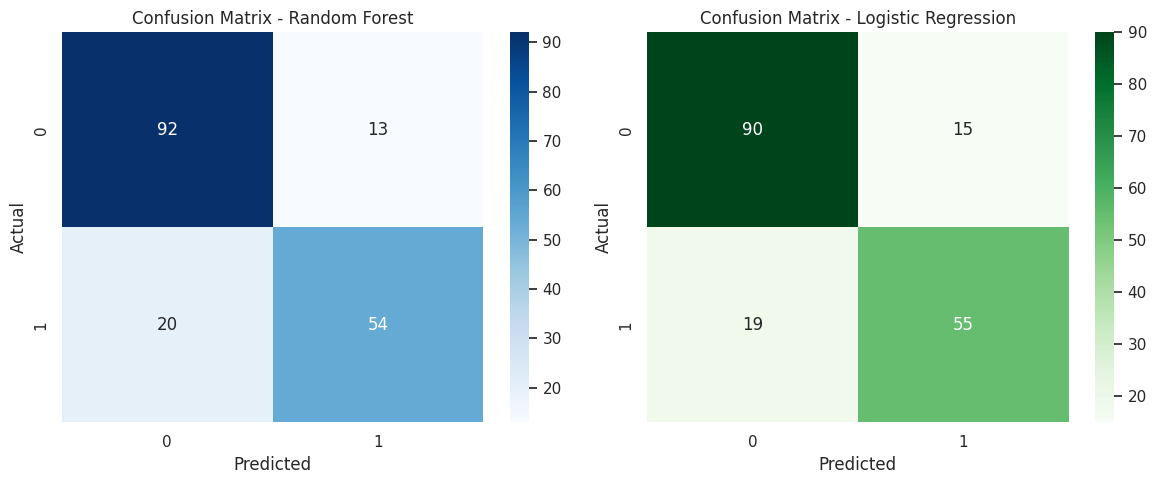

In [ ]:
# ========== VISUALISASI CONFUSION MATRIX ==========

cm_rf = confusion_matrix(y_test, pred_rf)
cm_log = confusion_matrix(y_test, pred_log)

plt.figure(figsize=(12,5))

# --- CM Random Forest ---
plt.subplot(1,2,1)
sns.heatmap(cm_rf, annot=True, cmap="Blues", fmt='d')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# --- CM Logistic Regression ---
plt.subplot(1,2,2)
sns.heatmap(cm_log, annot=True, cmap="Greens", fmt='d')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()